In [1]:
!gsutil ls gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series

gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series/
gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series/GLC24-PO-train-landsat-time-series-blue.parquet/
gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series/GLC24-PO-train-landsat-time-series-blue/
gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series/GLC24-PO-train-landsat-time-series-green.parquet/
gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series/GLC24-PO-train-landsat-time-series-nir.parquet/
gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series/GLC24-PO-train-landsat-time-series-red.parquet/
gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series/GLC24-PO-train-landsat-time-series-swir1.parquet/
gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series/GLC24-PO-train-landsat-time-series-swir2.parquet/


In [2]:
from geolifeclef.utils import get_spark

spark = get_spark()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/27 17:09:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/04/27 17:09:43 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).
24/04/27 17:09:45 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
ts_df = spark.read.parquet(
    "gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series/GLC24-PO-train-landsat-time-series-red.parquet/"
)

In [4]:
ts_df.show(truncate=False)

+--------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|surveyId|TimeSeries                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [5]:
sample_row = ts_df.take(4)[1]

In [6]:
import numpy as np
from scipy.fft import dct, idct

In [13]:
ts = np.array(sample_row["TimeSeries"])
x = ts
# ts[len(ts) - 1] = None
print(ts)
x_dct = dct(ts)
print(x_dct)
dct_filter = x_dct.copy()
dct_filter[8:] = 0
x_hat = idct(dct_filter)

[13. 19. 19. 13. 12. 17. 19. 16. 14. 13. 18. 21. 14. 19. 21. 17. 14. 17.
 18. 16. 14. 17. 18. 13. 14. 18. 18. 17. 13. 19. 20. 15. 12. 21. 21. 14.
 12. 20. 24. 17. 12. 20. 19. 15. 12. 16. 16. 14. 12. 16. 18. 15. 12. 15.
 20. 14. 13. 15. 15. 15. 12. 14. 16. 17. 17. 14. 18. 16. 15. 16. 14. 13.
 12. 16. 20. 15. 13. 13. 14. 15. 15. 15. 13. 13.]
[ 2.65400000e+03  8.53570556e+01 -3.81937227e+01 -2.82699344e+01
 -8.62761468e+00  3.34810183e+01 -4.66928245e+01 -3.77264356e+01
 -1.21811018e+01  1.30727388e+01  1.61216992e+01 -1.00825358e+00
  1.99481680e+01  5.80333643e+01 -2.39400946e+01 -5.07983104e+00
  1.08698783e+01 -1.22385207e+01  1.26334008e+01 -3.06412509e+01
 -4.99173338e+00  2.29610059e+00 -1.06890879e+01  1.42096578e+01
  1.48187762e+00  4.38724774e+01 -3.23491759e+00  4.64052091e+01
 -3.46410162e+01  1.52083744e+01 -1.26601745e+00  1.35437144e+01
 -1.03480222e+01 -4.69624475e+01  2.58872863e+01 -2.77180356e+01
 -2.10433297e+01 -5.94808194e+01 -6.33765970e+01 -5.19111415e+00
  4.7163

Text(0.5, 0, 'Index')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:82: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


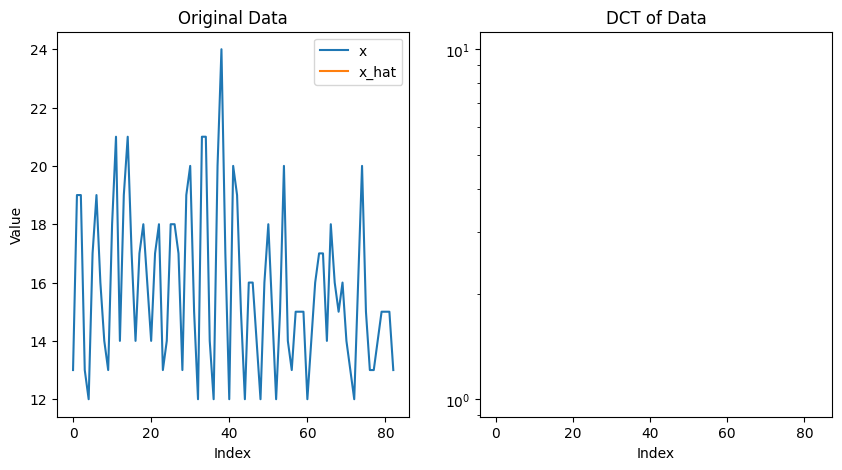

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, label="x")
plt.plot(x_hat, label="x_hat")
plt.legend()
plt.title("Original Data")
plt.xlabel("Index")
plt.ylabel("Value")

plt.subplot(1, 2, 2)
plt.yscale("log")
plt.stem(np.abs(x_dct), basefmt=" ")
plt.title("DCT of Data")
plt.xlabel("Index")

In [ ]:
po_df = spark.read.csv(
    "gs://dsgt-clef-geolifeclef-2024/data/downloaded/2024/PresenceOnlyOccurrences/GLC24-PO-metadata-train.csv",
    header=True,
    inferSchema=True,
)